<a href="https://colab.research.google.com/github/nhattan206/AI_project/blob/main/NhanDien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2

In [18]:
train_list = glob.glob('/content/drive/MyDrive/NhanDien/Train/*.jpg')
train_list.sort()
print (train_list)

['/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_00.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_01.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_02.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_03.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_04.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_05.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_06.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_07.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_08.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of BanVuong_09.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh1.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh10.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh2.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh3.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh4.jpg', '/content/drive/MyDrive/NhanDien/Train/Copy of hinh5.

In [19]:
test_list = glob.glob('/content/drive/MyDrive/NhanDien/Test/*.jpg')
test_list.sort()
print (test_list)

['/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_00.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_01.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_02.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_03.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_04.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_05.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_06.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_07.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_08.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanPhuc_09.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_00.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_01.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_02.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_03.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy of BanTruong_04.jpg', '/content/drive/MyDrive/NhanDien/Test/Copy o

In [20]:
x_train = np.zeros([len(train_list),150,150,3],dtype=np.uint8)

for i in range(len(train_list)):
  image = load_img(train_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_train[i] = array

x_test = np.zeros([len(test_list),150,150,3],dtype=np.uint8)

for i in range(len(test_list)):
  image = load_img(test_list[i],target_size=(150,150))
  array = img_to_array(image)
  x_test[i] = array

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [21]:
y_train = np.zeros([len(train_list)])
y_test = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

for i in range (len(train_list)):
  if i>21 and i<=len(train_list):
    y_train[i] = 1
  else:
    y_train[i] = 0
y_train = np_utils.to_categorical(y_train,2)
y_test = np_utils.to_categorical(y_test,2)
y_label = ['0','1']
print(y_train)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [22]:
#Tạo Model
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

In [23]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train, epochs=100,batch_size = 128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6822 - accuracy: 0.5000 - val_loss: 9.4189 - val_accuracy: 0.6774
Epoch 2/100
1/1 [==============================] - 0s 209ms/step - loss: 13.1039 - accuracy: 0.5500 - val_loss: 31.5115 - val_accuracy: 0.3226
Epoch 3/100
1/1 [==============================] - 0s 219ms/step - loss: 26.8233 - accuracy: 0.4500 - val_loss: 0.0515 - val_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 0s 287ms/step - loss: 0.4743 - accuracy: 0.9500 - val_loss: 10.8294 - val_accuracy: 0.6774
Epoch 5/100
1/1 [==============================] - 0s 219ms/step - loss: 14.7741 - accuracy: 0.5500 - val_loss: 3.3949 - val_accuracy: 0.7097
Epoch 6/100
1/1 [==============================] - 0s 186ms/step - loss: 4.1138 - accuracy: 0.6250 - val_loss: 3.2156 - val_accuracy: 0.6774
Epoch 7/100
1/1 [==============================] - 0s 145ms/step - loss: 1.8507 - accuracy: 0.9500 - val_loss: 19.5383 - val_accuracy: 0.3226
Epoch 8/10

In [24]:
# Save Model
model.save('NhanDien.h5')

In [25]:
#Danh gia
score = model.evaluate(x_test,y_test,verbose=0)
print ('loss = ',score[0])
print ('accuracy = ',score[1])

loss =  0.19175709784030914
accuracy =  0.9354838728904724


picture  21
picture  21
predictions number: [1]
predictions: 1


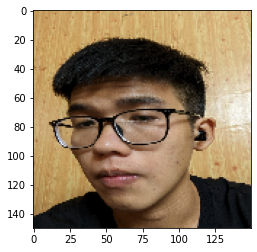

In [41]:
i = randint(0,len(test_list)-1)
print ('picture ',i)
predict_test = test_list[i]
image = load_img(predict_test,target_size=(150,150))
array = img_to_array(image)
plt.imshow(image)
#Du doan
sample = np.array([array])
predictions = np.argmax(model.predict(sample), axis=-1)
print ('picture ',i)
print("predictions number:", predictions)
print("predictions:", y_label[int(predictions)])

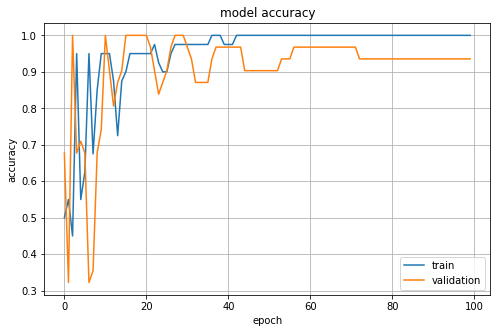

In [27]:
#Do thi
plt.figure(figsize=(8,5))
plt.grid(True)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='lower right')
plt.show()